# 1D transient diffusion

Transient diffusion problem is one of the most common phenomenon of real flow problems. Compared to the steady-state diffusion problem, non steady-state diffusion problem need to consider **the impact of time derivatives** on constant variables.

## Problem setup

Consider a one-dimensional non steady-state advection problem where a field variable $\phi$ is transported through the non steady-state diffusion process from $x = 0$ to $x = L$ in a one-dimensional domain. All the initial temprature is $ T = 200^\circ C$. At one moment, the the east of the field instantly transforms into $0^\circ C$, while the west maintains insulation. The fluid volumetric heat capacity($\rho c $) is $1. 0 \times1 0^{7} \mathrm{~ J / ( m^{3} \cdot~ K ) ~} $, $L = 0.02$ m, and the thermal conductivity $k=10$ W/(m $\cdot$ K). The domain is shown in the figure below.

![Adiabatic rod](images/transient_diffusion1d.jpg)

The mathematical model for one-dimensional non steady-state diffusion problem is
$$
\rho c \frac{\partial T}{\partial t} = \frac{\partial}{\partial x} \left( k \frac{\partial T}{\partial x} \right)
$$

The initial conditions are $T = 200^\circ C (t=0 \text{ s})$.
The boundary conditions are
$$
\begin{align*}
\frac{\partial T}{\partial x} &= 0 \quad && (x=0, t>0 \text{ s}) \\
T &= 0 ^\circ \text{C} \quad && (x=L, t>0 \text{ s})
\end{align*}
$$

The analytical solution for the problem is

$$
\frac{T(x,t)}{200} = \frac{4}{\pi} \sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{2n-1} \exp(-\alpha \lambda_n^2 t) \cos(\lambda_n x)
$$
where
$$
\lambda_n = \frac{(2n-1)\pi}{2L}, \quad \alpha = \frac{k}{\rho c}
$$

## Solve problem

### Define grid

Divide the rod evenly into 5 control volumes, as a result, the length of each control volume becomes $\Delta x=0.004$ m.

![Grid](images/transient_diffusion1d_grid.jpg)

### Discrete the non steady-state advection equation

The control equation of the 1d non steady-state advection equation is 
 $$\rho c \; \frac{\partial T} {\partial t}=\frac{\partial} {\partial x} \Big( k \; \frac{\partial T} {\partial x} \Big)+S$$ 
where the$c$is the specific heat capacity of material and the$k$is the material thermal conductivity.
Then we integrate the control equation during the $\Delta t$ in control volumn.

$$\int_{t}^{t+\Delta t} \int_{\Delta V} \rho c \frac{\partial T} {\partial t} \mathrm{d} V \mathrm{d} t=\int_{t}^{t+\Delta t} \int_{\Delta V} \frac{\partial} {\partial x} \Big( k \frac{\partial T} {\partial x} \Big) \mathrm{d} V \mathrm{d} t+\int_{t}^{t+\Delta t} \int_{\Delta V} S \mathrm{d} V \mathrm{d} t $$
By Gaussian formula, the volume integral can be converted into area fraction.

$$\int_{\Delta V} \biggl[ \int_{t}^{t+ \Delta t} \rho c \ \frac{\partial\, T} {\partial t} \mathrm{d} t \biggr] \mathrm{d} V=\int_{t}^{t+\Delta t} \biggl[ \Bigl( k A \ \frac{\partial\, T} {\partial x} \Bigr)_{e}-\Bigl( k A \ \frac{\partial\, T} {\partial x} \Bigr)_{w} \biggr] \mathrm{d} t+\int_{t}^{t+\Delta t} \overline{{S}} \ \Delta V \mathrm{d} t $$

We deal the time derivatives as $$\frac{T_{P}-T_{P}^{0}} {\Delta t}$$ where $T_{P}^{0}$ is the temperature of $P$ point at $t$ and $T_{P}$ is the temperature of $P$ point at $t+\Delta t$.
The left side can be wrote as
$$\int_{\Delta V} \biggl[ \int_{t}^{t+\Delta t} \rho c \ \frac{\partial\, T} {\partial t} \mathrm{d} t \biggl] \mathrm{d} V \approx\int_{\Delta V} \biggl[ \int_{t}^{t+\Delta t} \rho c \ \frac{T_{P}-T_{P}^{\vee}} {\Delta t} \mathrm{d} t \biggl] \mathrm{d} V=\rho c \left( \, T_{P}-T_{P}^{\vee} \, \right) \Delta V $$
Eventually, the discreted equation is 
$$\rho c({T_P} - T_P^0)\Delta V = \int_t^{t + \Delta } [ ({k_e}A\;\frac{{{T_E} - {T_P}}}{{\Delta {x_{PE}}}}) - ({k_w}A\;\frac{{{T_P} - {T_W}}}{{\Delta {x_{WP}}}})]dt + \int_t^{t + \Delta t} {\overline S } \Delta Vdt$$

To calculate the time integral of the diffusion term on the right side of equation above, we need to provide the relationship between the node temperatures $T_{P}$, $T_{E}$, and $T_{W}$ over time, which is unknown. The usual approach is to use the temperature at time $t$ (such as $T_{P}^{0}$) and the temperature at time $t+\Delta t$ (such as $T_{P}$) to weight and combine them to form the average temperature within this time interval, and then integrate and calculate. Mathematically, it manifests as 
$$\overline{{{{T_{P}}}}}=\theta T_{P}+( 1-\theta) \ T_{P}^{0} $$
The time integration is 
$$I_{T}=\int_{t}^{t+\Delta t} T_{P} \, \mathrm{d} t=\left[ \theta T_{P}+\left( 1-\theta\right) T_{P}^{0} \right] \Delta t $$
Take it into the discreted equation and to be divided by $A \Delta t$, we can get 

$$\begin{array} {l} {{{{\rho c \Big( \frac{T_{P}-T_{P}^{0}} {\Delta t} \Big) \Delta x=\theta\bigg[ \frac{k_{e} ( T_{E}-T_{P} )} {\Delta x_{P E}}-\frac{k_{w} ( T_{P}-T_{W} )} {\Delta x_{W P}} \bigg]}}}}  {{{{+( 1-\theta) \bigg[ \frac{k_{e} ( T_{E}^{0}-T_{P}^{0} )} {\Delta x_{P E}}-\frac{k_{w} ( T_{P}^{0}-T_{W}^{0} )} {\Delta x_{W P}} \bigg]+\bar{S} \Delta x}}}} \\ \end{array} $$

Organize it into something familiar to us 
$$\begin{aligned} {{a_{P} T_{P}=}} & {{} {{} a_{W} \big[ \theta T_{W}+( 1 \!-\! \theta) \, T_{W}^{0} \big]+a_{E} \big[ \theta T_{E}+( 1 \!-\! \theta) \, T_{E}^{0} \big]+\big[ a_{P}^{0} \!-\! ( 1 \!-\! \theta) a_{W}-( 1 \!-\! \theta) a_{E} \big] T_{P}^{0}+b}} \\ \end{aligned} $$
where
$$
a_{W}=\frac{k_{w}} {\Delta x_{W P}} \,, \, \, a_{E}=\frac{k_{e}} {\Delta x_{P E}} \,, \, \, a_{P}=a_{P}^{0} \,, \, \, a_{P}^{0}=\rho c \, \, \frac{\Delta x} {\Delta t} \,, b=\bar{S}\Delta x
$$
The choose of $\theta$ can determine the specific form of the equation, as the table 


| $\theta$      | Description |
| :---        |    :----:   |
| 0      | Explicit scheme       |
| 0.5   | Crank-Niclsion scheme(Implicit)        |
| 1   | Completely implicit scheme(Implicit)        |

### Solve the equation by explicit method

We can linearization the sourse term as 
$$b = S_u + S_p T_p^0$$
and take 
$$\theta = 0$$
into the equation above.
The discreted non steady-state advection equation by explicit method is 
$$ a_{P} \, T_{P} \!=\! a_{W} T_{W}^{0} \!+\! a_{E} T_{E}^{0} \!+\! \big[ \, a_{P}^{0} \!-\! ( a_{W} \!+\! a_{E} \!-\! S_{P} ) \, \big] T_{P}^{0} \!+\! S_{u} $$
, where 
$$a_{W}=\frac{k_{w}} {\Delta x_{W P}} \,, \, \, a_{E}=\frac{k_{e}} {\Delta x_{P E}} \,, \, \, a_{P}=a_{P}^{0} \,, \, \, a_{P}^{0}=\rho c \, \, \frac{\Delta x} {\Delta t} $$


According to the requirement of boundedness in discrete equations, all coefficients in the equation should be positive values, and the source term should be zero. Therefore we have  
$$a_{P}^{0}-a_{W}-a_{E} > 0. $$
and we can solve it as
$$ \Delta t \leq\rho c \; {\frac{( \Delta x )^{2}} {2 k}} $$
, which also means the discrate equation imposes a fairly strict constraint on the maximum value of the calculation time step $\Delta t $ for explicit formats. This will result in significant costs for improving computational accuracy in actual calculations, as the maximum possible time step decreases as the grid spatial scale decreases (grid refinement). Therefore, the explicit format is not suitable for calculating non-stationary problems in general situations. However, when the time interval is carefully selected to meet the requirements of limit above, the explicit format is still effective for calculating simple diffusion problems.

Here we go! 

**Internal Nodes 2, 3, 4**

The discrete equation satisfied by the internal nodes is

$$ a_{P} \, T_{P} \!=\! a_{W} T_{W}^{0} \!+\! a_{E} T_{E}^{0} \!+\! \big[ \, a_{P}^{0} \!-\! ( a_{W} \!+\! a_{E} \!-\! S_{P} ) \, \big] T_{P}^{0} \!+\! S_{u} $$

where

$$a_{W}=\frac{k_{w}} {\Delta x_{W P}} \,, \, \, a_{E}=\frac{k_{e}} {\Delta x_{P E}} \,, \, \, a_{P}=a_{P}^{0} \,, \, \, a_{P}^{0}=\rho c \, \, \frac{\Delta x} {\Delta t} $$

**Boundary Nodes 1**

$$\int_{\Delta V} \biggl[ \int_{t}^{t+\Delta t} \rho c \ \frac{\partial\, T} {\partial t} \mathrm{d} t \biggl] \mathrm{d} V \approx\int_{\Delta V} \biggl[ \int_{t}^{t+\Delta t} \rho c \ \frac{T_{P}-T_{P}^{\vee}} {\Delta t} \mathrm{d} t \biggl] \mathrm{d} V=\rho c \left( \, T_{P}-T_{P}^{\vee} \, \right) \Delta V $$

Under adiabatic conditions, take $\theta=0$, $\bar{S} = 0$, $k_{w}= 0$ into above equation. The control equation for the boundary node 1 is

$$\rho c \Big( \frac{T_{P}-T_{P}^{0}} {\Delta t} \Big) \Delta x=\Big[ \frac{k \, ( \, T_{E}^{0}-T_{P}^{0} \, )} {\Delta x} \Big] $$

**Boundary Nodes 5**

The temperature of east interface node is a constant $T_{B}$. The control equation for the boundary node 5 is
$$ \rho c \Big( \frac{T_{P}-T_{P}^{0}} {\Delta t} \Big) \Delta x=\left[ \frac{k ( T_{B}-T_{P}^{0} )} {\frac{\Delta x} {2}} \right]-\left[ \frac{k ( T_{P}^{0}-T_{W}^{0} )} {\Delta x} \right] $$

**Organize coefficient matrix**
By organizing the coefficient of above nodes, we can get 


| node     | $a_{W}$ | $a_{E}$ | $a_{P}^{0}$ | $a_{P}$ | $S_{P}$ | $S_{u}$ |
| :---     |    :----:   | :----:   | :----:   | :----:   | :----:   |:----:   |
|  1   | 0    |   ${\frac{k} {\Delta x}}$   | $\rho c {\frac {\Delta x}{\Delta t}}$ | $a_{P}^{0}$|0|0|
| 2,3,4   |    ${\frac{k} {\Delta x}}$   |${\frac{k} {\Delta x}}$| $\rho c {\frac {\Delta x}{\Delta t}}$ | $a_{P}^{0}$ |0|0|
|  5  | ${\frac{k} {\Delta x}}$   |  0 | $\rho c {\frac {\Delta x}{\Delta t}}$ | $a_{P}^{0}$ |$-{\frac{2k} {\Delta x}}$|  ${\frac{2k} {\Delta x}} T_{B}$|

**Limitation of $\Delta t$ by explicit method**

$$
\Delta t \! < \! \rho c \; \frac{( \Delta x )^{2}} {2 k} \!=\! 8 \; \mathrm{s} 
$$

### Solve algebraic equations (explicit method)

In [1]:
import numpy as np                      # for array operation
from matplotlib import pyplot as plt    # for plotting figures

In [2]:
# -----------------------------------------------------------------------
dt = 2.0                                # time step size(dt<8)
# -----------------------------------------------------------------------
total_time = 120                        # total simulation time
nx = 5                                  # number of spatial grid points
L = 0.02                                # length of the domain
dx = L / nx                             # spatial grid size
x = np.linspace(0.5*dx, L-0.5*dx, nx)   # spatial grid points
T0 = 200                                # initial temperature
rho_c = 1.0e7                           # fluid density plus specific heat
k = 10                                  # thermal conductivity
aW = k/dx
aE = k/dx
ap0 = rho_c * dx / dt

In [3]:
# Calculate numerical solution
def analytical_solution(x, t, k=k, rho_c=rho_c, L=L):
    result = np.zeros_like(x)           # initialize result array
    alpha = k / rho_c
    for i in range(1, 1000):
        lamda_i = (2 * i - 1) * np.pi / (2 * L)
        result += 800 / np.pi * (-1) ** (i + 1)/(2 * i - 1) * np.exp(-alpha * lamda_i**2 * t) * np.cos(lamda_i * x)
    
    return result

In [4]:
# Renew coefficients
def renew_explicit(a, b, nx):
    for i in range(1, nx + 1):
        a[i][i] = ap0
    
    b[1] = aE * T_old[2] + (ap0 - (aE + 0 - 0)) * T_old[1]
    
    for i in range(2, nx):
        b[i] = aW * T_old[i - 1] + aE * T_old[i + 1] + (ap0 - (aW + aE - 0)) * T_old[i]
    
    b[nx] = aW * T_old[nx - 1] + (ap0 - (aW + 0 + 2 * aW)) * T_old[nx]

In [5]:
# TDMA iteration
def TDMA(a, b, T, nx):
    C = np.zeros(nx + 1)
    phi = np.zeros(nx + 1)
    alph = np.zeros(nx + 1)
    belt = np.zeros(nx + 1)
    D = np.zeros(nx + 1)
    A = np.zeros(nx + 1)
    Cpi = np.zeros(nx + 1)
    
    for j in range(1, nx + 1):
        belt[j] = -a[j][j - 1]
        D[j] = a[j][j]
        alph[j] = -a[j][j + 1] if j < nx else 0
        C[j] = b[j]
    
    for j in range(1, nx + 1):
        denom = D[j] - belt[j] * A[j - 1]
        A[j] = alph[j] / denom if denom != 0 else 0
        Cpi[j] = (belt[j] * Cpi[j - 1] + C[j]) / denom if denom != 0 else 0
    
    phi[nx] = Cpi[nx]
    for j in range(nx - 1, 0,  - 1):
        phi[j] = A[j] * phi[j + 1] + Cpi[j]
    
    for j in range(1, nx + 1):
        T[j] = phi[j]

In [6]:
# Jacobi iteration
def Jacobi(A,b,T,k):
    AA = A[1 : nx + 1, 1 : nx + 1]
    bb = b[1 : nx + 1]
    n = AA.shape[1]
    D = np.eye(n)
    D[np.arange(n),np.arange(n)] = AA[np.arange(n),np.arange(n)]
    LU = D - AA
    X = np.zeros(n)
    for i in range(k):
        D_inv = np.linalg.inv(D)
        X =  np.dot(np.dot(D_inv,LU),X) + np.dot(D_inv,bb)
    for i in range(1 ,nx + 1):
        T[i] = X[i - 1]

In [7]:
# Output results
def output():
    print("-----------")
    print("time = {}".format(time))
    for i in range(1, nx + 1):
        print(T[i])

In [8]:
# Major routine
a = np.zeros((nx + 1, nx + 1))      # left side of matrix
b = np.zeros(nx + 1)                # right side of matrix
T = np.zeros(nx + 1)                # temperature at current time step
T_old = np.zeros(nx + 1)            # temperature at previous time step
time = 0.0                          # current time

for i in range(1, nx + 1):
    T[i] = T0
    T_old[i] = T0

output_explicit_dt_2 = np.zeros((3, nx))    # to store output for dt=2
maker = 0

# Time loop
while time <= total_time:
    time += dt
    renew_explicit(a, b, nx)                # calculate explicit coefficients
    # TDMA(a, b, T, nx)                     # solve the system of equations using TDMA
    Jacobi(a, b, T, nx)                     # solve the system of equations using Jacobi
    for i in range(1, nx + 1):
        T_old[i] = T[i]                     # update previous temperature values
    output()
    if time % 40 == 0:
        output_explicit_dt_2[maker, :] = T[1:nx + 1]
        maker += 1   

-----------
time = 2.0
200.0
200.0
200.0
200.0
150.0
-----------
time = 4.0
200.0
200.0
200.0
193.75
118.75
-----------
time = 6.0
200.0
200.0
199.21875
185.15625
98.4375
-----------
time = 8.0
200.0
199.90234375
197.55859375
176.07421875
84.66796875
-----------
time = 10.0
199.98779296875
199.62158203125
195.166015625
167.333984375
74.9267578125
-----------
time = 12.0
199.9420166015625
199.11041259765625
192.24395751953125
159.2620849609375
67.7459716796875
-----------
time = 14.0
199.83806610107422
198.3560562133789
188.97953033447266
151.94530487060547
62.248992919921875
-----------
time = 16.0
199.6528148651123
197.36924171447754
185.52231788635254
145.36254405975342
57.898783683776855
-----------
time = 18.0
199.36736822128296
196.17382287979126
181.98321163654327
139.44954574108124
54.35705780982971
-----------
time = 20.0
198.9681750535965
194.79918964207172
178.44032980501652
134.12969298660755
51.404354348778725
-----------
time = 22.0
198.4470518771559
193.27545533888042
174

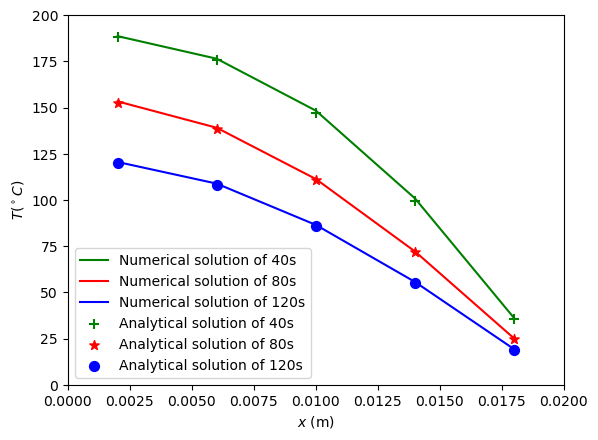

In [9]:
# Visualization
T_true_40 = analytical_solution(x, 40)  # calculate the analytical solution
T_true_80 = analytical_solution(x, 80)  
T_true_120 = analytical_solution(x, 120)
plt.figure()                           
plt.plot(x, output_explicit_dt_2[0], '-g', label='Numerical solution of 40s')
plt.plot(x, output_explicit_dt_2[1], '-r', label='Numerical solution of 80s')
plt.plot(x, output_explicit_dt_2[2], '-b', label='Numerical solution of 120s')
plt.scatter(x, T_true_40, s=50, c='g', marker='+', label='Analytical solution of 40s')
plt.scatter(x, T_true_80, s=50, c='r', marker='*', label='Analytical solution of 80s')
plt.scatter(x, T_true_120, s=50, c='b', marker='o', label='Analytical solution of 120s')
plt.xlabel('$x$ (m)')
plt.ylabel('$T$($^\circ C$)')
ax = plt.gca()
ax.set_xlim(0, 0.02)
ax.set_ylim(0, 200)
plt.legend(loc='lower left')
plt.show()                              # show the figure

-----------
time = 8.0
200.0
200.0
200.0
200.0
0.0
-----------
time = 16.0
200.0
200.0
200.0
100.0
100.0
-----------
time = 24.0
200.0
200.0
150.0
150.0
0.0
-----------
time = 32.0
200.0
175.0
175.0
75.0
75.0
-----------
time = 40.0
187.5
187.5
125.0
125.0
0.0


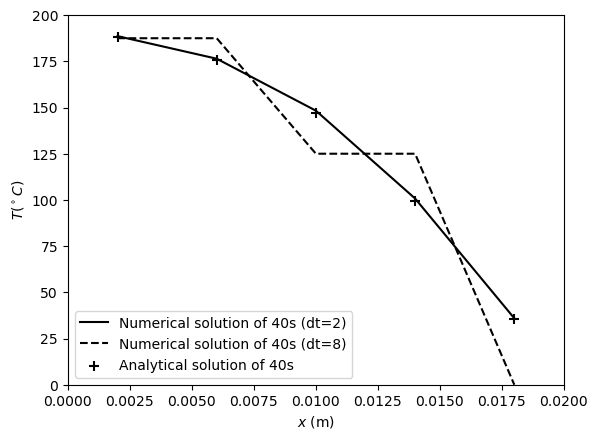

In [10]:
# Investigate the effects of time step
dt = 8.0                                # time step size(dt<=08)
nx = 5                                  # number of spatial grid points
L = 0.02                                # length of the domain
dx = L / nx                             # spatial grid size
x = np.linspace(0.5*dx, L-0.5*dx, nx)   # spatial grid points
T0 = 200                                # initial temperature
rho_c = 1.0e7                           # fluid density plus specific heat
k = 10                                  # thermal conductivity
aW = k/dx
aE = k/dx
ap0 = rho_c * dx / dt
a = np.zeros((nx + 1, nx + 1))
b = np.zeros(nx + 1)
T = np.zeros(nx + 1)
T_old = np.zeros(nx + 1)
time = 0.0

for i in range(0, nx+1):
    T[i] = T0
    T_old[i] = T0

# Time loop
while time < 40:
    time += dt
    renew_explicit(a, b, nx)
    # TDMA(a, b, T, nx)
    Jacobi(a, b, T, nx)
    for i in range(1, nx+1):
        T_old[i] = T[i]
    output()

output_explicit_dt_8 = T[1:nx+1]
plt.figure()                            # create a new figure
plt.plot(x, output_explicit_dt_2[0], '-k', label='Numerical solution of 40s (dt=2)')
plt.plot(x, output_explicit_dt_8, '--k', label='Numerical solution of 40s (dt=8)')
plt.scatter(x, T_true_40, s=50, c='k', marker='+', label='Analytical solution of 40s')
plt.xlabel('$x$ (m)')
plt.ylabel('$T$($^\circ C$)')
ax = plt.gca()
ax.set_xlim(0, 0.02)
ax.set_ylim(0, 200)
plt.legend(loc='lower left')
plt.show()                              # show the figure

```{note}
Reducing the time step can effectively improve the accuracy of numerical calculation results.
```

### Solve the equation by completely implicit method

We can linearization the sourse term as 
$$b = S_u + S_p T_p$$
and take 
$$\theta = 0$$
into the equation 
$$\begin{aligned} {{a_{P} T_{P}=}} & {{} {{} a_{W} \big[ \theta T_{W}+( 1 \!-\! \theta) \, T_{W}^{0} \big]+a_{E} \big[ \theta T_{E}+( 1 \!-\! \theta) \, T_{E}^{0} \big]+\big[ a_{P}^{0} \!-\! ( 1 \!-\! \theta) a_{W}-( 1 \!-\! \theta) a_{E} \big] T_{P}+b}} \\ \end{aligned} $$
The discreted non steady-state advection equation by completely implicit method is 
$$ a_{P} \, T_{P} \!=\! a_{W} T_{W} \!+\! a_{E} T_{E} \!+\! \, a_{P}^{0}  \,  T_{P}^{0} \!+\! S_{u} $$
, where 

$$a_{W}=\frac{k_{w}} {\Delta x_{W P}} \,, \, \, a_{E}=\frac{k_{e}} {\Delta x_{P E}} \,, \, \, a_{P}^{0}=\rho c \, \, \frac{\Delta x} {\Delta t} \,, \, \, a_{P}=a_{P}^{0}+a_{W}+a_{E}-S_{P} $$


From the above equation, it can be seen that all coefficients maintain positive values So the fully implicit format is unconditionally stable for any time step At However, the calculation accuracy is only first-order intercept, and to ensure the calculation accuracy, a smaller time step should also be selected The fully implicit scheme is widely used in solving various non-stationary problems due to its unconditional stability and good convergence.

Here we go! 

**Internal Nodes 2, 3, 4**

$$ a_{P} \, T_{P} \!=\! a_{W} T_{W} \!+\! a_{E} T_{E} \!+\! \, a_{P}^{0}  \,  T_{P}^{0} \!+\! S_{u} $$
, where 

$$a_{W}=\frac{k_{w}} {\Delta x_{W P}} \,, \, \, a_{E}=\frac{k_{e}} {\Delta x_{P E}} \,, \, \, a_{P}^{0}=\rho c \, \, \frac{\Delta x} {\Delta t} \,, \, \, a_{P}=a_{P}^{0}+a_{W}+a_{E}-S_{P} $$

**Boundary Nodes 1**
Take the bondary condition into the discreted equation like what we have done in explicit method, we will get 
$$\rho c \Big( \frac{T_{P}-T_{P}^{0}} {\Delta t} \Big) \Delta x=\frac{k ( T_{E}^{0}-T_{P}^{0} )} {\Delta x} $$

**Boundary Nodes 5**
$$\rho c \Big( \frac{T_{P}-T_{P}^{0}} {\Delta t} \Big) \Delta x=\left[ \frac{k \left( T_{B}-T_{P}^{0} \right)} {\frac{\Delta x} {2}}-\frac{k \left( T_{P}^{0}-T_{W}^{0} \right)} {\Delta x} \right] $$

**Organize coefficient matrix**
By organizing the coefficient of above nodes, we can get 


| node     | $a_{W}$ | $a_{E}$ | $a_{P}^{0}$ | $a_{P}$ | $S_{P}$ | $S_{u}$ |
| :---     |    :----:   | :----:   | :----:   | :----:   | :----:   |:----:   |
|  1   | 0    |   ${\frac{k} {\Delta x}}$   | $\rho c {\frac {\Delta x}{\Delta t}}$ | 0|0|$a_{w} + a_{E}+a_{P}^{0} -S_{P}$|
| 2,3,4   |    ${\frac{k} {\Delta x}}$   |${\frac{k} {\Delta x}}$| $\rho c {\frac {\Delta x}{\Delta t}}$ | 0 |0|$a_{w} + a_{E}+a_{P}^{0} -S_{P}$|
|  5  | ${\frac{k} {\Delta x}}$   |  0 | $\rho c {\frac {\Delta x}{\Delta t}}$ | $-{\frac{2k} {\Delta x}}$ |$-{\frac{2k} {\Delta x}}T_{B}$| $a_{w} + a_{E}+a_{P}^{0} -S_{P}$|

### Solve algebraic equations (completely implicit method)
What we need to do is just ***change the renew function***. 

In [11]:
# Update coefficients for implicit method
def renew_implicit(a, b, nx):
    a[1, 1] = ap0 + aE - 0
    a[1, 2] = -aE
    for i in range(2, nx):
        a[i][i - 1] = -aW
        a[i][i] = ap0 + (aW + aE - 0)
        a[i][i + 1] = -aE
    a[nx, nx - 1] = -aW
    a[nx, nx] = ap0 + aW + 2 * aW
        
    for i in range(1, nx + 1):
        b[i] = ap0 * T_old[i]

In [12]:
a = np.zeros((nx + 1, nx + 1))
b = np.zeros(nx + 1)
T = np.zeros(nx + 1)
T_old = np.zeros(nx + 1)
time = 0.0
dt = 8.0

for i in range(0, nx + 1):
    T[i] = T0
    T_old[i] = T0

# Time loop
while time < 40:
    time += dt
    renew_implicit(a, b, nx)
    # TDMA(a, b, T, nx)
    Jacobi(a, b, T, 100)
    for i in range(1, nx + 1):
        T_old[i] = T[i]
    output()

output_implicit_dt_8 = T[1:nx + 1]

-----------
time = 8.0
199.44751381215474
198.3425414364641
193.92265193370167
177.34806629834253
115.4696132596685
-----------
time = 16.0
197.85262965110962
194.66286132901928
184.11373279203934
153.9467659717347
76.97719849821435
-----------
time = 24.0
195.0190109483703
189.3517735428917
173.06236056515792
134.67020313366135
57.72492002601801
-----------
time = 32.0
191.00352102015404
182.97254116372153
162.18309654894873
119.63512390175754
47.01699279075872
-----------
time = 40.0
186.004571656615
176.00667292953688
152.07703773408934
107.93528490892314
40.39385409808811


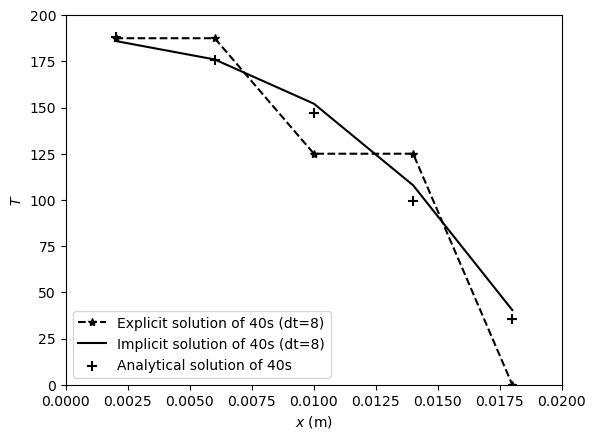

In [13]:
# Visualization
plt.figure()                            # create a new figure
plt.plot(x, output_explicit_dt_8, '--*k', label='Explicit solution of 40s (dt=8)')
plt.plot(x, output_implicit_dt_8, '-k', label='Implicit solution of 40s (dt=8)')
plt.scatter(x, T_true_40, s=50, c='k', marker='+', label='Analytical solution of 40s')
plt.xlabel('$x$ (m)')
plt.ylabel(r'$T$')
ax = plt.gca()
ax.set_xlim(0, 0.02)
ax.set_ylim(0, 200)
plt.legend(loc='lower left')
plt.show()                              # show the figure

## Exercise

1. Can you solve the problem by using the Crank-Nicolson scheme?

2. Compare the results from the explicit, the Crank-Nicolson and the implict schemes regarding accuracy and stability.